In [95]:
# importing 
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

#viewing the available data on bom.movies for the first analysis
df1 = pd.read_csv("bom.movie_gross.csv")
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [96]:
#droping all movies that did not have any income 
df1_drop = df1.dropna()
df1_drop

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [97]:
#summing up the total income and dropping all null collums
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors= "coerce")
df1["gross"] = df1["domestic_gross"] + df1 ["foreign_gross"]
df1_drop2=df1.dropna()
df1_drop2

,title,studio,domestic_gross,foreign_gross,year,gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [98]:
# arranging data to detamine the one with the heighest top ten returns in profit
df1_sorted1=df1_drop2.sort_values(by="gross", ascending=False)
df1_top10 = df1_sorted1.head(10)
df1_top10

,title,studio,domestic_gross,foreign_gross,year,gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


In [99]:
# the above table shows that movies from 'BV studio' have the most movies with heighest gross income

[]

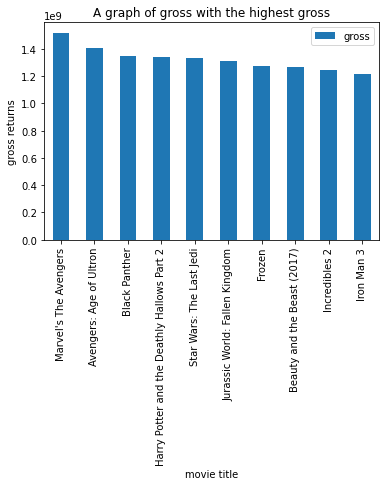

In [100]:
# graphical representation of the title vs the gross
df1_top10.plot(kind="bar", x="title", y="gross")
plt.xlabel("movie title")
plt.ylabel("gross returns")
plt.title("A graph of gross with the highest gross")
plt.plot()

[]

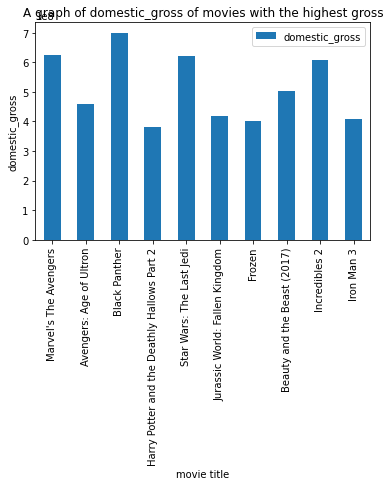

In [101]:
df1_top10.plot(kind="bar", x="title", y="domestic_gross")
plt.xlabel("movie title")
plt.ylabel("domestic_gross")
plt.title("A graph of domestic_gross of movies with the highest gross")
plt.plot()

[]

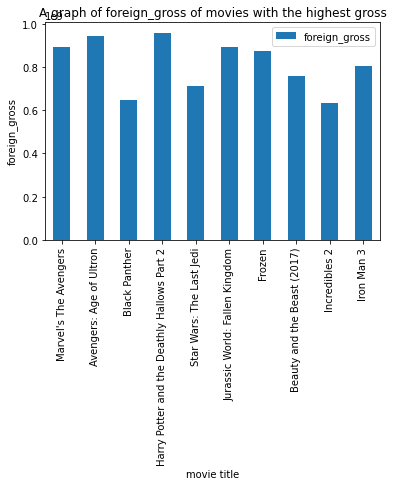

In [102]:
df1_top10.plot(kind="bar", x="title", y="foreign_gross")
plt.xlabel("movie title")
plt.ylabel("foreign_gross")
plt.title("A graph of foreign_gross of movies with the highest gross")

plt.plot()

In [103]:
# the movie with the highest gross is "Marvel the Avengers" when considering those movies with the highest gross
# the movie with the highest domesic gross is "Marvel the Avengers" when considering those movies with the highest gross
# the movie with the highest foreign gross is "Harry Potter and the Deathly Hallows Part 2" when considering those movies with the highest gross

[]

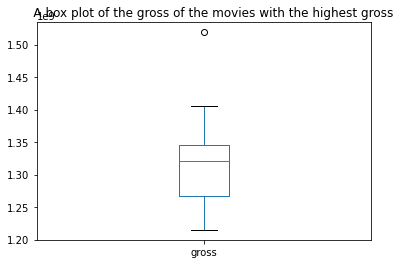

In [104]:
# graphical representation of the title vs the gross
df1_top10["gross"].plot(kind="box")
plt.title ("     A box plot of the gross of the movies with the highest gross")
plt.plot()

In [105]:
#finding the mean and median
df1_mean=df1_top10["gross"].mean()
print(df1_mean)
df1_median=df1_top10["gross"].median()
print(df1_median)

1325240000.0
1321050000.0


[]

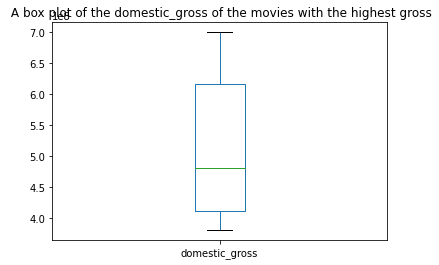

In [106]:
df1_top10["domestic_gross"].plot(kind="box")
plt.title  (" A box plot of the domestic_gross of the movies with the highest gross")
plt.plot()

In [107]:
#finding the mean and median
df1_mean=df1_top10["domestic_gross"].mean()
print(df1_mean)
df1_median=df1_top10["domestic_gross"].median()
print(df1_median)

512370000.0
481500000.0


[]

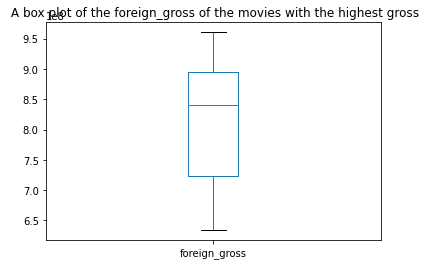

In [108]:
df1_top10["foreign_gross"].plot(kind="box")
plt.title (" A box plot of the foreign_gross of the movies with the highest gross")
plt.plot()

In [109]:
df1_mean=df1_top10["foreign_gross"].mean()
print(df1_mean)
df1_median=df1_top10["foreign_gross"].median()
print(df1_median)

812870000.0
840750000.0


In [110]:
#from the analysis above if is profitable to invest in scifi movies that involve a superhero saving the day if not that then an animation so as as to get maximum profits. 
# the median and mean is around the movie "star wars" which is a science fiction superhero movie

In [111]:
#sorting with respect to the highest foreign gross
df1_sorted2 = df1_drop2.sort_values(by="foreign_gross", ascending=False)
df1_top10a= df1_sorted2.head(10)
df1_top10a

,title,studio,domestic_gross,foreign_gross,year,gross
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017,8.703000e+08
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014,1.104000e+09
1876,Minions,Uni.,336000000.0,823400000.0,2015,1.159400e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


[]

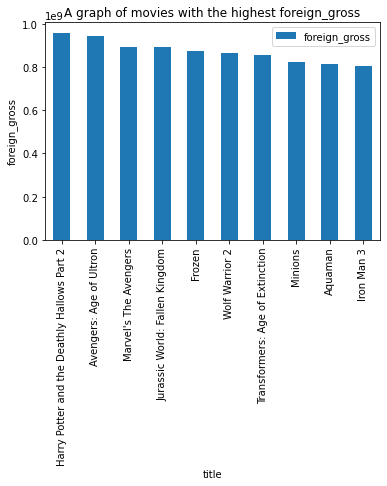

In [112]:
df1_top10a.plot(kind="bar", x="title", y="foreign_gross")
plt.xlabel("title")
plt.ylabel("foreign_gross")
plt.title("A graph of movies with the highest foreign_gross")
plt.plot()



[]

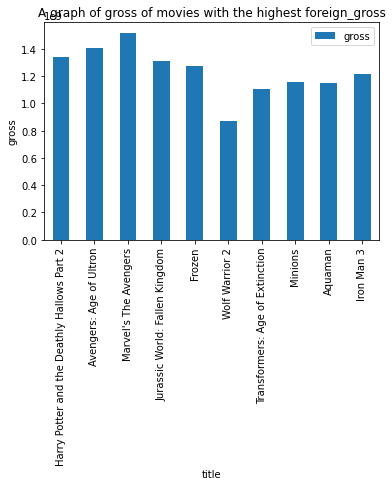

In [113]:
df1_top10a.plot(kind="bar", x="title", y="gross")
plt.xlabel("title")
plt.ylabel("gross")
plt.title("A graph of gross of movies with the highest foreign_gross")
plt.plot()



[]

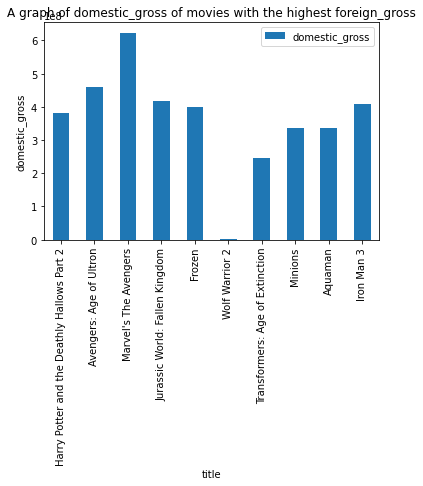

In [114]:
df1_top10a.plot(kind="bar", x="title", y="domestic_gross")
plt.xlabel("title")
plt.ylabel("domestic_gross")
plt.title("A graph of domestic_gross of movies with the highest foreign_gross")
plt.plot()

In [115]:
# the movie with the highest gross is "Harry Potter and the Deathly Hallows Part 2" when considering those movies with the highest foreign_gross
# the movie with the highest domesic gross is "Marvel the Avengers" when considering those movies with the highest foreign_gross
# the movie with the highest foreign gross is "Marvel's The Avengers" when considering those movies with the highest foreign_gross

In [116]:
#sorting with respect to the highest foreign gross
df1_sorted3 = df1_drop2.sort_values(by="domestic_gross", ascending=False)
df1_top10b= df1_sorted3.head(10)
df1_top10b

,title,studio,domestic_gross,foreign_gross,year,gross
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
2324,Finding Dory,BV,486300000.0,542300000.0,2016,1.028600e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
729,The Dark Knight Rises,WB,448100000.0,636800000.0,2012,1.084900e+09
1131,The Hunger Games: Catching Fire,LGF,424700000.0,440300000.0,2013,8.650000e+08


[]

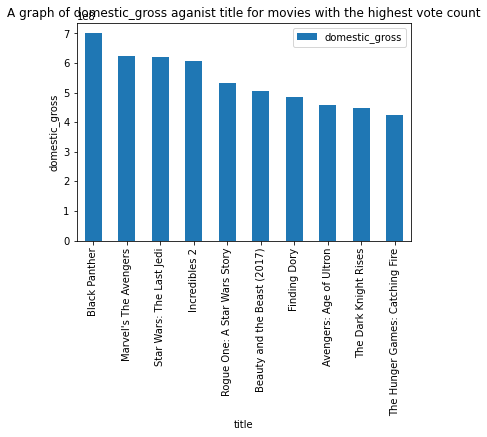

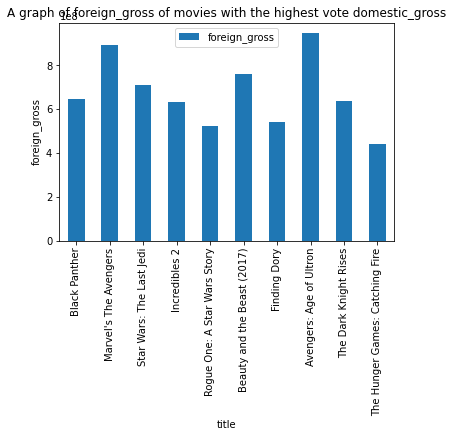

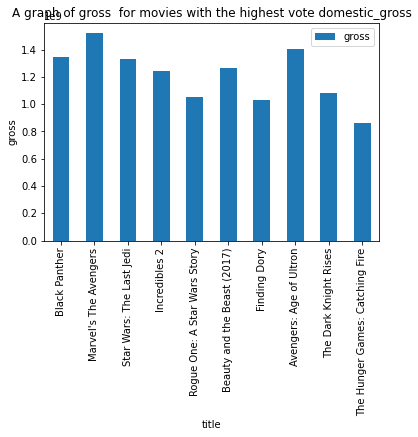

In [117]:
df1_top10b.plot(kind="bar", x="title", y="domestic_gross")
plt.xlabel("title")
plt.ylabel("domestic_gross")
plt.title("A graph of domestic_gross aganist title for movies with the highest vote count")
plt.plot()

df1_top10b.plot(kind="bar", x="title", y="foreign_gross")
plt.xlabel("title")
plt.ylabel("foreign_gross")
plt.title("A graph of foreign_gross of movies with the highest vote domestic_gross")
plt.plot()

df1_top10b.plot(kind="bar", x="title", y="gross")
plt.xlabel("title")
plt.ylabel("gross")
plt.title("A graph of gross  for movies with the highest vote domestic_gross")
plt.plot()

In [118]:
# the movie with the highest domesic gross is "Black Panther" when considering those movies with the highest domestic_gross
# the movie with the highest foreign gross is "Avengers: Age of Ultron" when considering those movies with the highest domestic_gross
# the movie with the highest gross is "Marvel's The Avengers" when considering those movies with the highest domestic_gross

In [119]:
# from the analysis above if is profitable to invest in scifi movies that involve a superhero saving the day if not that then an animation so as as to 

In [120]:
#viewing the available data on tmdb.movies.csv for the second analysis
df2 = pd.read_csv("tmdb.movies.csv")
df2

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [121]:
# sorting with respect to vote count
df2_sorted1=df2.sort_values(by="vote_count", ascending=False)
df2_top10a = df2_sorted1.head(10)
df2_top10a

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
17383,17383,"[28, 12, 35]",293660,en,Deadpool,35.067,2016-02-12,Deadpool,7.6,20175
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
11032,11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
5189,5189,"[18, 37]",68718,en,Django Unchained,21.260,2012-12-25,Django Unchained,8.0,15725
5235,5235,"[878, 12, 14]",70160,en,The Hunger Games,14.212,2012-03-23,The Hunger Games,7.1,14587
14177,14177,"[28, 12, 878]",76341,en,Mad Max: Fury Road,28.099,2015-05-15,Mad Max: Fury Road,7.4,14454
7881,7881,"[28, 12, 878]",68721,en,Iron Man 3,32.093,2013-05-03,Iron Man 3,6.9,14155


In [122]:
# the movies with the highest vote count do not neccessarily have the highest popularity

[]

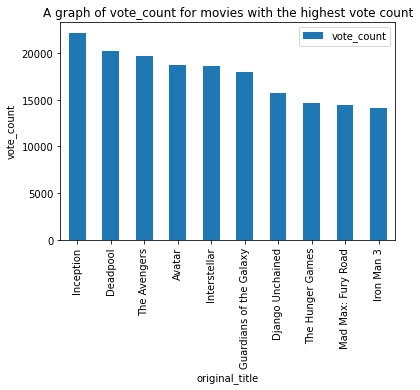

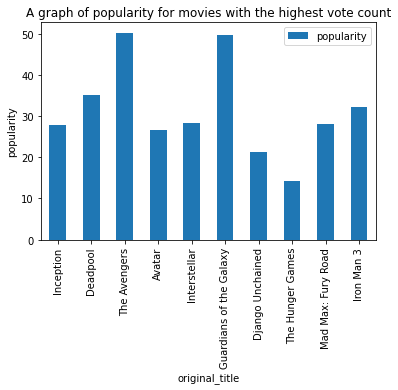

In [123]:
# below the bar graph of the popularity
df2_top10a.plot(kind="bar", x="original_title", y="vote_count")
plt.xlabel("original_title")
plt.ylabel("vote_count")
plt.title("A graph of vote_count for movies with the highest vote count")
plt.plot()

df2_top10a.plot(kind="bar", x="original_title", y="popularity")
plt.xlabel("original_title")
plt.ylabel("popularity")
plt.title("A graph of popularity for movies with the highest vote count")
plt.plot()

In [124]:
# the "avengers" is the most popular movie while inception has the most vote count when considering movies with the highest vote count
# these are scifi movies that once again top the chart in terms of most preffered movie

In [125]:
# sorting with respect to popularity
df2_sorted2=df2.sort_values(by="popularity", ascending=False)
df2_top10b = df2_sorted2.head(10)
df2_top10b

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


In [126]:
# the movie with the highest popularity does not have the highest vote count

[]

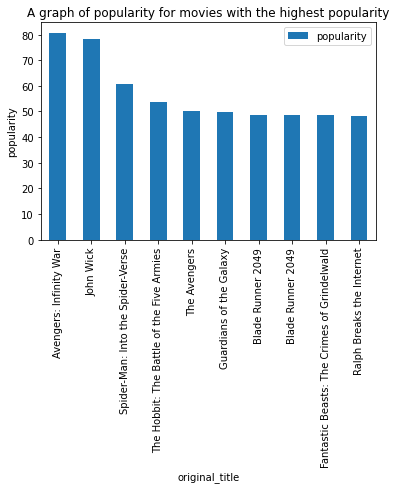

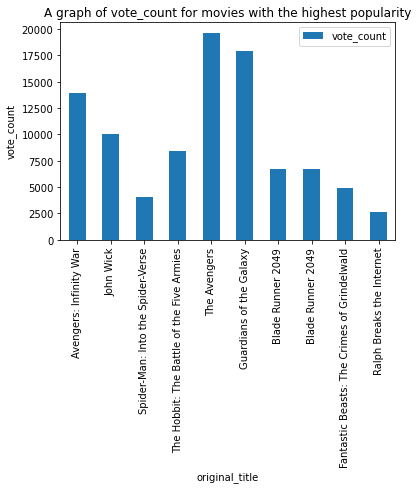

In [127]:
df2_top10b.plot(kind="bar", x="original_title", y="popularity")
plt.xlabel("original_title")
plt.ylabel("popularity")
plt.title("A graph of popularity for movies with the highest popularity")
plt.plot()

df2_top10b.plot(kind="bar", x="original_title", y="vote_count")
plt.xlabel("original_title")
plt.ylabel("vote_count")
plt.title("A graph of vote_count for movies with the highest popularity")
plt.plot()

In [128]:
# from the above graph the "avegers" is the movie with the most vote count while "Avengers: Infinity War" is the most popular
# these are science fiction super hero movie once again tops the chart in terms of most preffered movie

In [129]:
# veiwing tn.movie_budgets.csv
df3 = pd.read_csv("tn.movie_budgets.csv")
df3["worldwide_gross"] = pd.to_numeric(df3['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float))
df3["domestic_gross"] = pd.to_numeric(df3['domestic_gross'].str.replace('[\$,]', '', regex=True).astype(float))
df3["production_budget"] = pd.to_numeric(df3['production_budget'].str.replace('[\$,]', '', regex=True).astype(float))
df3["gross_totalearned"]= df3["worldwide_gross"] + df3["domestic_gross"]
df3["totalearned"]= df3["gross_totalearned"] - df3["production_budget"]
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_totalearned,totalearned
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00,-7.000000e+03
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.889770e+05,2.829770e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2.676000e+03,-2.324000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00,-1.400000e+03


In [130]:
df3_sort1= df3.sort_values(by="production_budget", ascending=False)
df3_top10a=df3_sort1.head(10)
df3_top10a

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_totalearned,totalearned
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.989973e+09,2.683973e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.726950e+09,2.426950e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,1.272841e+09,9.728408e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,8.849695e+08,5.849695e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,1.079695e+09,7.796951e+08


In [131]:
# The avatar movie was the most expensive to produce

In [141]:
df3_sort1= df3.sort_values(by="production_budget", ascending=False)
df3_bottom10b=df3_sort1.tail(10)
df3_bottom10b

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_totalearned,totalearned
5772,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4584.0,9168.0,168.0
5773,74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928.0,4082848.0,4075848.0
5774,75,"Oct 8, 2004",Primer,7000.0,424760.0,841926.0,1266686.0,1259686.0
5775,76,"May 26, 2006",Cavite,7000.0,70071.0,71644.0,141715.0,134715.0
5776,77,"Dec 31, 2004",The Mongol King,7000.0,900.0,900.0,1800.0,-5200.0
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0,0.0,-7000.0
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0,288977.0,282977.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0,2676.0,-2324.0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0,0.0,-1400.0
5781,82,"Aug 5, 2005",My Date With Drew,1100.0,181041.0,181041.0,362082.0,360982.0


[]

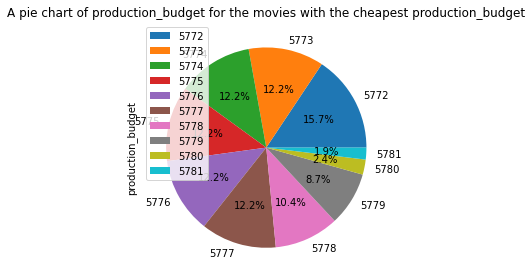

In [144]:
df3_bottom10b.plot(kind="pie", autopct="%1.1f%%", y = "production_budget")
plt.title("A pie chart of production_budget for the movies with the cheapest production_budget")
plt.tight_layout()
plt.plot()

In [133]:
# "Newlyweds" was the cheapest movie to produce

In [134]:
df3_sort2= df3.sort_values(by="gross_totalearned", ascending=False)
df3_top10c=df3_sort2.head(10)
df3_top10c

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_totalearned,totalearned
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.989973e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.867572e+09,2.667572e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.726950e+09,2.426950e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.301125e+09,2.086125e+09
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,2.141215e+09,1.916215e+09
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,2.048318e+09,1.848318e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.871730e+09,1.681730e+09
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09


In [135]:
#The avatar movie was the with the highest sum of the domestic and worldwide gross

In [136]:
df3_sort3= df3.sort_values(by="totalearned", ascending=False)
df3_top10d=df3_sort3.head(10)
df3_top10d

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_totalearned,totalearned
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.989973e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.867572e+09,2.667572e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.726950e+09,2.426950e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.301125e+09,2.086125e+09
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,2.141215e+09,1.916215e+09
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,2.048318e+09,1.848318e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.871730e+09,1.681730e+09
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,1.851102e+09,1.651102e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09


[]

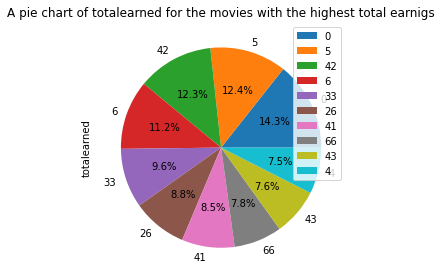

In [143]:

df3_top10d.plot(kind="pie", autopct="%1.1f%%", y = "totalearned")
plt.title("A pie chart of totalearned for the movies with the highest total earnigs")
plt.tight_layout()
plt.plot()

In [138]:
# the avatar movie has the highest returns

In [139]:
df4 = pd.read_csv("rt.movie_info.tsv", sep='\t')
df4

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [56]:
df4_droped = df4.dropna()
df4_sorted = df4_droped.sort_values(by ="box_office",  ascending=False)
df4_top30 = df4_sorted.head(30)
df4_top30

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1510,1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011","May 3, 2011",$,"98,000,000",119 minutes,Sony Pictures
1469,1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,"Aug 12, 2016","Nov 8, 2016",$,"97,661,826",89 minutes,Sony Pictures
816,1055,The grim futility of the war between Bosnia an...,R,Art House and International|Drama,Danis Tanovic,Danis Tanovic,"Dec 21, 2001","Apr 9, 2002",$,"948,054",98 minutes,United Artists Pictures
1016,1317,"For an awkward, self-conscious girl like Kiki,...",PG-13,Comedy|Drama|Romance,Joe Roth,Donna Roth|Billy Crystal|Peter Tolan,"Jul 20, 2001","Nov 13, 2001",$,"93,008,426",103 minutes,Columbia Pictures
1464,1884,What do you get when you mix fearless comedic ...,PG-13,Comedy,David Zucker,Craig Mazin|David Zucker,"Apr 14, 2006","Aug 15, 2006",$,"90,672,025",83 minutes,Weinstein Co.
956,1237,"Sarah Jessica Parker, Greg Kinnear, Pierce Bro...",PG-13,Comedy,Douglas McGrath,Aline Brosh McKenna,"Sep 16, 2011","Jan 3, 2012",$,"9,500,000",89 minutes,The Weinstein Co.
1393,1798,For the Tibetan Mastiffs living on Snow Mounta...,PG,Animation|Comedy|Kids and Family,Ash Brannon,Ash Brannon|Kurt Voelker,"Feb 24, 2017","May 23, 2017",$,"9,404,922",80 minutes,Summit Premiere
1448,1865,"When a weathered, God-fearing ex-blues musicia...",R,Drama,Craig Brewer,Craig Brewer,"Mar 2, 2007","Jun 26, 2007",$,"9,262,318",115 minutes,Paramount Vantage
467,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes,WB
189,250,BYZANTIUM is director Neil Jordan's (Interview...,R,Art House and International|Drama|Horror|Myste...,Neil Jordan,Moira Buffini,"Jun 28, 2013","Oct 29, 2013",$,"84,293",118 minutes,IFC Films


[]

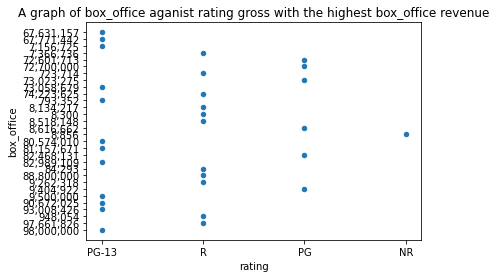

In [57]:
df4_top30.plot(kind="scatter", x="rating", y="box_office")
plt.title("A graph of box_office aganist rating gross with the highest box_office revenue")
plt.plot()

In [ ]:
# PG-13 rated has the most viewed returns at the box office
# the genre that is most watched at the box office is Action and Adventure|Comedy|Science Fiction an...

In [ ]:
# conclusion Science Fiction would be the best movies to invest in for production